In [76]:
#Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Importing Modules
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
import os
import sqlite3
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,func

In [77]:
pip install tensorflow

In [78]:
#Importing Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
os.getcwd()

'/content'

In [80]:
# load csv file
credit_record = pd.read_csv("drive/MyDrive/Colab Notebooks/Project-4/Resources/credit_record.csv")
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [81]:
# read application_record
credit_application= pd.read_csv("drive/MyDrive/Colab Notebooks/Project-4/Resources/application_record.csv")
credit_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


**Creating and setting up sqlite database engines and connection to read the csv files**

In [82]:
conn = sqlite3.connect('credit_record.sqlite')
credit_record.to_sql(name='credit_record',con=conn,if_exists='replace',index=True)

1048575

In [83]:
engine = create_engine("sqlite:///credit_record.sqlite")

In [84]:
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
pd.read_sql("Select * from credit_record",con = conn)

,index,ID,MONTHS_BALANCE,STATUS
0,0,5001711,0,X
1,1,5001711,-1,0
2,2,5001711,-2,0
3,3,5001711,-3,0
4,4,5001712,0,C
...,...,...,...,...
1048570,1048570,5150487,-25,C
1048571,1048571,5150487,-26,C
1048572,1048572,5150487,-27,C
1048573,1048573,5150487,-28,C


In [85]:
conn = sqlite3.connect('credit_application.sqlite')
credit_application.to_sql(name='credit_application',con=conn,if_exists='replace',index=True)

438557

In [86]:
engine = create_engine("sqlite:///credit_application.sqlite")

In [87]:
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
pd.read_sql("Select * from credit_application",con = conn)

,index,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,None,1.0
438553,438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,None,2.0


In [88]:
#Finding Number of Unique Values
credit_application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

**Treating Duplicate ID's**

In [89]:
#Finding Duplicated Values
credit_application[credit_application['ID'].isin(credit_application['ID'][credit_application['ID'].duplicated()])].sort_values('ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


In [90]:
#Dropping Duplicated Values
credit_application_unique = credit_application.drop_duplicates(subset='ID',keep= False,inplace =False)
credit_application_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL       

**credit_record Dataframe**

In [91]:
#  unique table shape credit record
credit_application_unique.shape

(438463, 18)

In [92]:
# original table shape credit application
credit_record.shape

(1048575, 3)

In [93]:
#credit record info
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [94]:
#unique records in credit record csv
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

**Analysing Credit Decision**

In [95]:
credit_decision = pd.DataFrame()
credit_decision['ID'] = credit_record['ID'].unique()

In [96]:
def get_credit_decision(id):
    """Determines, for a given client ID, if the client is good or bad based on payment history and card usage."""

    # checks if there is at least one payment with more than 30 days delay
    if sum(credit_record[credit_record['ID']==id]['STATUS'].isin(['1','2','3','4','5']))>0:
        return 0

    # if not, checks if the client never used the credit card
    elif sum(credit_record[credit_record['ID']==id]['STATUS'].isin(['X']))==len(credit_record[credit_record['ID']==id]['STATUS']):
        return -1

    # if not, assumes the client is a good payer
    else:
        return 1

In [97]:
# Creates a 'Decision' column in credit_decision dataset and calls get_credit_decision() to get the correct cluster
credit_decision['Decision'] = credit_decision['ID'].map(get_credit_decision)

credit_decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        45985 non-null  int64
 1   Decision  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


In [98]:
credit_decision['Decision'].value_counts()

 1    36099
 0     5350
-1     4536
Name: Decision, dtype: int64

**Cleaning Data**


In [99]:
# excludes all customers without sufficient data (category -1)
credit_decision = credit_decision[credit_decision['Decision']!=-1]

In [100]:
credit_decision['Decision'].value_counts()

1    36099
0     5350
Name: Decision, dtype: int64

**Joining Dataframes**

In [101]:
credit_data = pd.merge(credit_decision,credit_application_unique)
credit_data.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008810,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [102]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33110 entries, 0 to 33109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   33110 non-null  int64  
 1   Decision             33110 non-null  int64  
 2   CODE_GENDER          33110 non-null  object 
 3   FLAG_OWN_CAR         33110 non-null  object 
 4   FLAG_OWN_REALTY      33110 non-null  object 
 5   CNT_CHILDREN         33110 non-null  int64  
 6   AMT_INCOME_TOTAL     33110 non-null  float64
 7   NAME_INCOME_TYPE     33110 non-null  object 
 8   NAME_EDUCATION_TYPE  33110 non-null  object 
 9   NAME_FAMILY_STATUS   33110 non-null  object 
 10  NAME_HOUSING_TYPE    33110 non-null  object 
 11  DAYS_BIRTH           33110 non-null  int64  
 12  DAYS_EMPLOYED        33110 non-null  int64  
 13  FLAG_MOBIL           33110 non-null  int64  
 14  FLAG_WORK_PHONE      33110 non-null  int64  
 15  FLAG_PHONE           33110 non-null 

**Treating Null Data**

In [103]:
credit_data.isnull().sum()

ID                         0
Decision                   0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        10373
CNT_FAM_MEMBERS            0
dtype: int64

In [104]:
credit_data.dropna(inplace=True)
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22737 entries, 2 to 33109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   22737 non-null  int64  
 1   Decision             22737 non-null  int64  
 2   CODE_GENDER          22737 non-null  object 
 3   FLAG_OWN_CAR         22737 non-null  object 
 4   FLAG_OWN_REALTY      22737 non-null  object 
 5   CNT_CHILDREN         22737 non-null  int64  
 6   AMT_INCOME_TOTAL     22737 non-null  float64
 7   NAME_INCOME_TYPE     22737 non-null  object 
 8   NAME_EDUCATION_TYPE  22737 non-null  object 
 9   NAME_FAMILY_STATUS   22737 non-null  object 
 10  NAME_HOUSING_TYPE    22737 non-null  object 
 11  DAYS_BIRTH           22737 non-null  int64  
 12  DAYS_EMPLOYED        22737 non-null  int64  
 13  FLAG_MOBIL           22737 non-null  int64  
 14  FLAG_WORK_PHONE      22737 non-null  int64  
 15  FLAG_PHONE           22737 non-null 

In [105]:
# Convert categorical data to numeric with pd.get_dummies
credit_data = pd.get_dummies(credit_data,dtype=float)
credit_data.head()

,ID,Decision,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
2,5008806,1,0,112500.0,-21474,-1134,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5008808,1,0,270000.0,-19110,-3051,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5008810,1,0,270000.0,-19110,-3051,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5008811,1,0,270000.0,-19110,-3051,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,5008815,1,0,270000.0,-16872,-769,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Checking Imbalance Data**

In [106]:
credit_data['Decision'].value_counts(normalize=True)

1    0.864142
0    0.135858
Name: Decision, dtype: float64

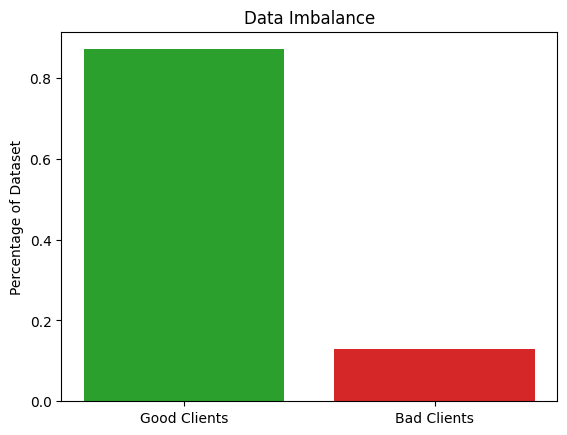

In [107]:
fig, ax = plt.subplots()

client = ['Good Clients','Bad Clients']
proportions = credit_decision['Decision'].value_counts(normalize=True)
bar_colors = ['tab:green', 'tab:red']

ax.bar(client, proportions, color=bar_colors)

ax.set_ylabel('Percentage of Dataset')
ax.set_title('Data Imbalance')
fig.show()

In [108]:
#split our preprocessed data into our features and target arrays
y = credit_data["Decision"]
X = credit_data.drop(columns=['Decision'])

In [109]:
y

2        1
3        1
4        1
5        1
9        1
        ..
33105    1
33106    1
33107    1
33108    1
33109    1
Name: Decision, Length: 22737, dtype: int64

In [110]:
X

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5008810,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5008811,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,5008815,0,270000.0,-16872,-769,1,1,1,1,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,5150480,1,157500.0,-10808,-1739,1,0,0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33106,5150482,1,157500.0,-10808,-1739,1,0,0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33107,5150484,1,157500.0,-10808,-1739,1,0,0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33108,5150485,1,157500.0,-10808,-1739,1,0,0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=1,
                                                 stratify=y)
X_train.shape

(17052, 55)

In [112]:
#create a standard scaler instances
scaler = StandardScaler()

#fit the standardscaler
X_scaler = scaler.fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Create a Logistic Regression Model with the Original Data**

In [113]:
logistic_regression_model = LogisticRegression(random_state=1)
logistic_regression_model

LogisticRegression(random_state=1)

In [114]:
# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)
lr_model

LogisticRegression(random_state=1)

In [115]:
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.8641215106732348
Testing Data Score: 0.8642040457343887


In [116]:
# Make a prediction using the testing data
training_predictions = lr_model.predict(X_train)
training_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [117]:
#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)
testing_predictions


array([1, 1, 1, ..., 1, 1, 1])

In [118]:

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)


[[    0  2317]
 [    0 14735]]


In [119]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2317
           1       0.86      1.00      0.93     14735

    accuracy                           0.86     17052
   macro avg       0.43      0.50      0.46     17052
weighted avg       0.75      0.86      0.80     17052



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       772
           1       0.86      1.00      0.93      4913

    accuracy                           0.86      5685
   macro avg       0.43      0.50      0.46      5685
weighted avg       0.75      0.86      0.80      5685



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Compile,Train and Evaluate the Model**

**Attempt # 1** layer1 units =10 , activation = relu layer 2 units = 20 , activation = relu layer 3 units =1 , activation = sigmoid

In [121]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=10,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=20,activation="relu"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Check the structure of the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                560       
                                                                 
 dense_16 (Dense)            (None, 20)                220       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Compile the model
nn_model.compile(loss = "binary_crossentropy",optimizer="adam",metrics = ["accuracy"])

In [123]:
#Train the Model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
533/533 [==============================] - 3s 2ms/step - loss: 0.4344 - accuracy: 0.8550
Epoch 2/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8643
Epoch 3/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8647
Epoch 4/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3864 - accuracy: 0.8649
Epoch 5/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8651
Epoch 6/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8655
Epoch 7/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8656
Epoch 8/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8659
Epoch 9/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8661
Epoch 10/50
533/533 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8661

In [124]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

178/178 - 0s - loss: 0.3867 - accuracy: 0.8644 - 325ms/epoch - 2ms/step
Loss: 0.38671040534973145, Accuracy: 0.8643799424171448


<Axes: >

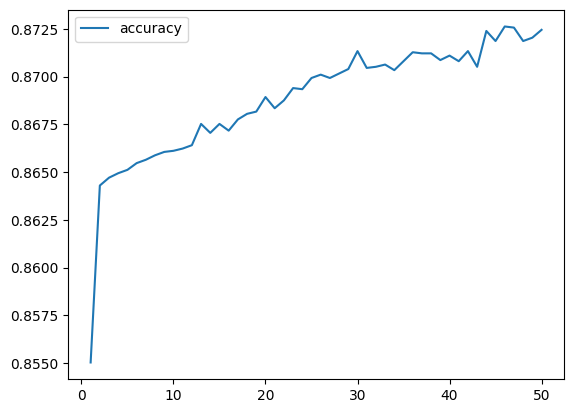

In [125]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

**Data Model Optimization**

**Attempt # 2**  layer1 units =12 , activation = relu layer 2 units = 25 , activation = relu layer 3 units =1 , activation = sigmoid

In [126]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=12,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=25,activation="relu"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Check the structure of the model
nn_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                672       
                                                                 
 dense_19 (Dense)            (None, 25)                325       
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,023
Trainable params: 1,023
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [128]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
533/533 [==============================] - 2s 2ms/step - loss: 0.4301 - accuracy: 0.8567
Epoch 2/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8645
Epoch 3/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.8648
Epoch 4/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3849 - accuracy: 0.8646
Epoch 5/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8645
Epoch 6/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8646
Epoch 7/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3766 - accuracy: 0.8649
Epoch 8/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3746 - accuracy: 0.8649
Epoch 9/100
533/533 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8652
Epoch 10/100
533/533 [==============================] - 1s 3ms/step - loss: 0.3708 - accura

In [129]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


178/178 - 0s - loss: 0.3925 - accuracy: 0.8610 - 324ms/epoch - 2ms/step
Loss: 0.3925057053565979, Accuracy: 0.8610377907752991


<Axes: >

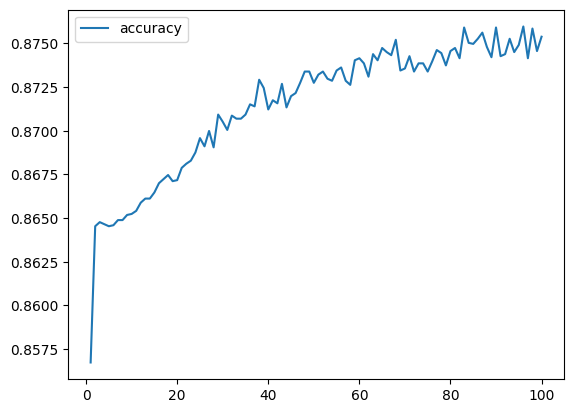

In [130]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

 **Attempt # 3**
Layer 1 units =10 , activation = relu
Layer 2 units =15 , activation = sigmoid
layer 3 units =1 , activation = tanh

In [131]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=10,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=15,activation="sigmoid"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="tanh"))
#Check the structure of the model
nn_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                560       
                                                                 
 dense_22 (Dense)            (None, 15)                165       
                                                                 
 dense_23 (Dense)            (None, 1)                 16        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [133]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
533/533 [==============================] - 2s 2ms/step - loss: 0.5969 - accuracy: 0.7566
Epoch 2/100
533/533 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8641
Epoch 3/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8641
Epoch 4/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3937 - accuracy: 0.8641
Epoch 5/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8641
Epoch 6/100
533/533 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8641
Epoch 7/100
533/533 [==============================] - 1s 3ms/step - loss: 0.3893 - accuracy: 0.8641
Epoch 8/100
533/533 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8641
Epoch 9/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8641
Epoch 10/100
533/533 [==============================] - 1s 2ms/step - loss: 0.3853 - accura

In [134]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

178/178 - 0s - loss: 0.3986 - accuracy: 0.8612 - 445ms/epoch - 2ms/step
Loss: 0.3985556960105896, Accuracy: 0.861213743686676


<Axes: >

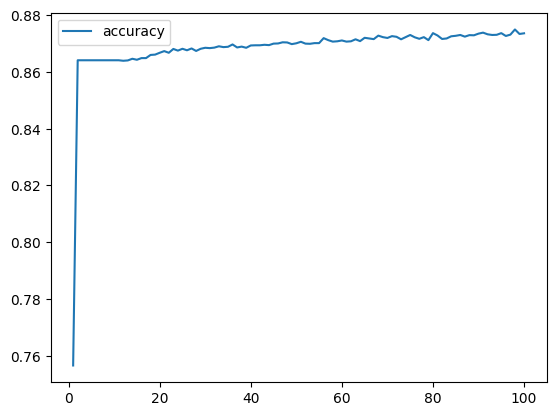

In [135]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')


**Attempt # 4**
layer1 unit =15 ,activation = relu
layer2 unit =30 ,activation = relu
layer 3 unit =1 , activation = tanh

In [136]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=15,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=30,activation="relu"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="tanh"))
#Check the structure of the model
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                840       
                                                                 
 dense_25 (Dense)            (None, 30)                480       
                                                                 
 dense_26 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [138]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
533/533 [==============================] - 3s 3ms/step - loss: 1.1977 - accuracy: 0.7154
Epoch 2/200
533/533 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8632
Epoch 3/200
533/533 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8638
Epoch 4/200
533/533 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8643
Epoch 5/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3959 - accuracy: 0.8646
Epoch 6/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8647
Epoch 7/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8647
Epoch 8/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3870 - accuracy: 0.8648
Epoch 9/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.8652
Epoch 10/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3823 - accura

In [139]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

178/178 - 0s - loss: 0.4302 - accuracy: 0.8612 - 324ms/epoch - 2ms/step
Loss: 0.43019118905067444, Accuracy: 0.861213743686676


<Axes: >

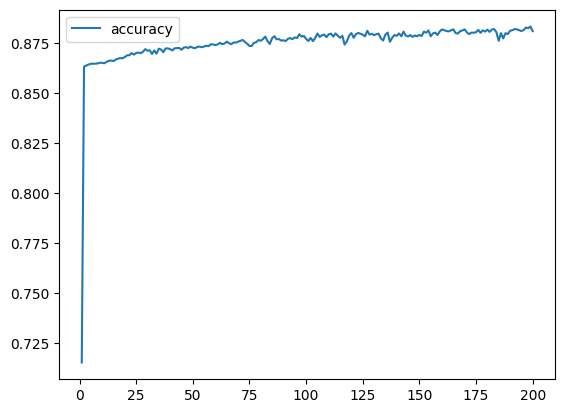

In [140]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

**Attempt # 5**
layer1 unit =10 ,activation = sigmoid
layer2 unit =15 ,activation = relu
layer 3 unit =1 , activation = tanh

In [141]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=10,activation="sigmoid",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=15,activation="relu"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="tanh"))
#Check the structure of the model
nn_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                560       
                                                                 
 dense_28 (Dense)            (None, 15)                165       
                                                                 
 dense_29 (Dense)            (None, 1)                 16        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [142]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [143]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
533/533 [==============================] - 2s 2ms/step - loss: 0.4241 - accuracy: 0.8469
Epoch 2/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8647
Epoch 3/200
533/533 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8647
Epoch 4/200
533/533 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.8646
Epoch 5/200
533/533 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8646
Epoch 6/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8647
Epoch 7/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8646
Epoch 8/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8646
Epoch 9/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.8646
Epoch 10/200
533/533 [==============================] - 1s 2ms/step - loss: 0.3856 - accura

In [144]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

178/178 - 0s - loss: 0.4153 - accuracy: 0.8640 - 347ms/epoch - 2ms/step
Loss: 0.41531339287757874, Accuracy: 0.8640281558036804


<Axes: >

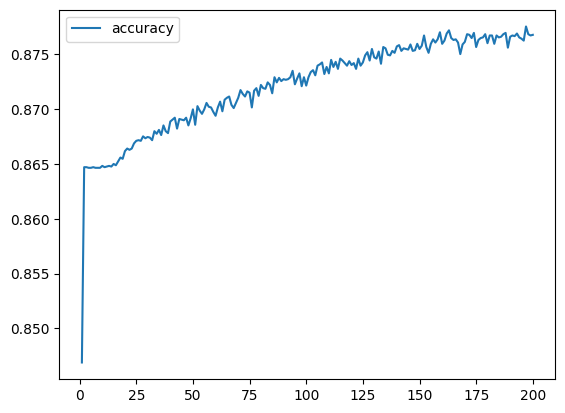

In [145]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

**Displaying Overall Model Performance**

In [146]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Attemt #','First Hidden Layer', 'Second Hidden Layer', 'Output Layer', 'Epochs','Loss','Accuracy']
table.add_row(['1', 'relu 10 units', 'relu 20 units','sigmoid 1 unit','50','.392','.864'])
table.add_row(['2', 'relu 12 units','relu 25 units','sigmoid 1 unit','100','.396','.862'])
table.add_row(['3', 'relu 10 units','sigmoid 15 units','tanh 1 unit','100','.393','.864'])
table.add_row(['4','relu 15 units','relu 30 units','tanh 1 unit','200','.44','.860'])
table.add_row(['5','sigmoid 10 units','relu 15 units','tanh 1 unit','200','.39','.865'])

print(table)

+----------+--------------------+---------------------+----------------+--------+------+----------+
| Attemt # | First Hidden Layer | Second Hidden Layer |  Output Layer  | Epochs | Loss | Accuracy |
+----------+--------------------+---------------------+----------------+--------+------+----------+
|    1     |   relu 10 units    |    relu 20 units    | sigmoid 1 unit |   50   | .392 |   .864   |
|    2     |   relu 12 units    |    relu 25 units    | sigmoid 1 unit |  100   | .396 |   .862   |
|    3     |   relu 10 units    |   sigmoid 15 units  |  tanh 1 unit   |  100   | .393 |   .864   |
|    4     |   relu 15 units    |    relu 30 units    |  tanh 1 unit   |  200   | .44  |   .860   |
|    5     |  sigmoid 10 units  |    relu 15 units    |  tanh 1 unit   |  200   | .39  |   .865   |
+----------+--------------------+---------------------+----------------+--------+------+----------+


In [147]:
# Export our model to HDF5 file
from google.colab import files
nn_model.save('/content/Credit_record_nn_model.h5')
files.download('/content/Credit_record_nn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>